In [1]:
import time
import random
import numpy as np

# Simulating HR processes as functions with random execution times
def data_validation():
    time.sleep(random.uniform(0.1, 0.3))  # Simulate delay
    return "Data Validated"

def approval_process():
    time.sleep(random.uniform(0.2, 0.5))
    return "Approved"

def send_notification():
    time.sleep(random.uniform(0.05, 0.2))
    return "Notification Sent"

# Simulating a workflow
def hr_workflow():
    start_time = time.time()
    
    validation = data_validation()
    approval = approval_process()
    notification = send_notification()
    
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Run the workflow multiple times to gather performance data
execution_times = [hr_workflow() for _ in range(100)]
average_time = np.mean(execution_times)
print(f"Average Execution Time: {average_time:.2f} seconds")


Average Execution Time: 0.87 seconds


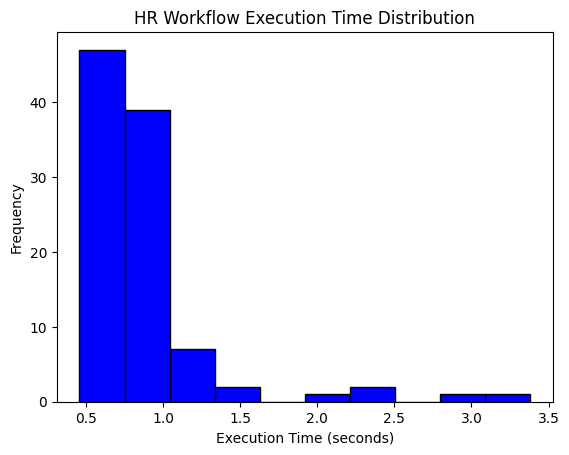

Max Execution Time: 3.38 seconds
Min Execution Time: 0.46 seconds
Standard Deviation: 0.45 seconds


In [2]:
import matplotlib.pyplot as plt

# Plotting execution times
plt.hist(execution_times, bins=10, color='blue', edgecolor='black')
plt.title('HR Workflow Execution Time Distribution')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Identifying bottlenecks
print(f"Max Execution Time: {np.max(execution_times):.2f} seconds")
print(f"Min Execution Time: {np.min(execution_times):.2f} seconds")
print(f"Standard Deviation: {np.std(execution_times):.2f} seconds")


In [3]:
from concurrent.futures import ThreadPoolExecutor

# Optimized approval process
def optimized_approval_process():
    time.sleep(random.uniform(0.1, 0.3))  # Reduced time
    return "Optimized Approval"

# Parallel execution of tasks
def optimized_hr_workflow():
    start_time = time.time()
    
    with ThreadPoolExecutor() as executor:
        validation = executor.submit(data_validation)
        approval = executor.submit(optimized_approval_process)
        notification = executor.submit(send_notification)
        
        validation.result()
        approval.result()
        notification.result()
    
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Measure the performance of the optimized workflow
optimized_execution_times = [optimized_hr_workflow() for _ in range(100)]
optimized_average_time = np.mean(optimized_execution_times)
print(f"Optimized Average Execution Time: {optimized_average_time:.2f} seconds")


Optimized Average Execution Time: 0.29 seconds


Efficiency Gain: 66.40%


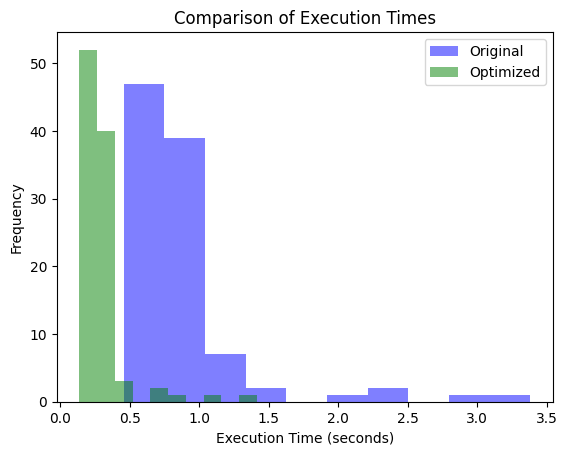

In [4]:
# Efficiency gains
efficiency_gain = ((average_time - optimized_average_time) / average_time) * 100
print(f"Efficiency Gain: {efficiency_gain:.2f}%")

# Plotting comparison
plt.hist(execution_times, bins=10, alpha=0.5, label='Original', color='blue')
plt.hist(optimized_execution_times, bins=10, alpha=0.5, label='Optimized', color='green')
plt.title('Comparison of Execution Times')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
